<a href="https://colab.research.google.com/github/tanishdua06/CODSOFT/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data=pd.read_csv("spam.csv")
print(data)
print(data.shape)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]
(5572, 2)


In [ ]:
data.drop_duplicates()
print(data)
print(data.shape)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]
(5572, 2)


In [ ]:
data['Category']=data['Category'].replace({'ham':'Not spam'})
print(data)

      Category                                            Message
0     Not spam  Go until jurong point, crazy.. Available only ...
1     Not spam                      Ok lar... Joking wif u oni...
2         spam  Free entry in 2 a wkly comp to win FA Cup fina...
3     Not spam  U dun say so early hor... U c already then say...
4     Not spam  Nah I don't think he goes to usf, he lives aro...
...        ...                                                ...
5567      spam  This is the 2nd time we have tried 2 contact u...
5568  Not spam               Will ü b going to esplanade fr home?
5569  Not spam  Pity, * was in mood for that. So...any other s...
5570  Not spam  The guy did some bitching but I acted like i'd...
5571  Not spam                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
data.isnull().sum()

,0
Category,0
Message,0


In [ ]:
X=data["Message"]
y=data["Category"]
print(X)



0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(y)


0       Not spam
1       Not spam
2           spam
3       Not spam
4       Not spam
          ...   
5567        spam
5568    Not spam
5569    Not spam
5570    Not spam
5571    Not spam
Name: Category, Length: 5572, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# Splitting the date into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# data into IF-IDF vectors
vectorizer=TfidfVectorizer(stop_words='english')
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)




ACCURACY,CLASSIFICATION REPORT AND CONFUSION MATRIX FROM LOGISTIC REGRESSION


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

model=LogisticRegression()
model.fit(X_train_tfidf,y_train)

y_pred=model.predict(X_test_tfidf)

Accuracy_of_model=accuracy_score(y_test,y_pred)
print("Accuracy:",Accuracy_of_model)

classification_report1=classification_report(y_test,y_pred)
print("Classification Report:\n",classification_report1)

Accuracy: 0.967713004484305
Classification Report:
               precision    recall  f1-score   support

    Not spam       0.96      1.00      0.98       966
        spam       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



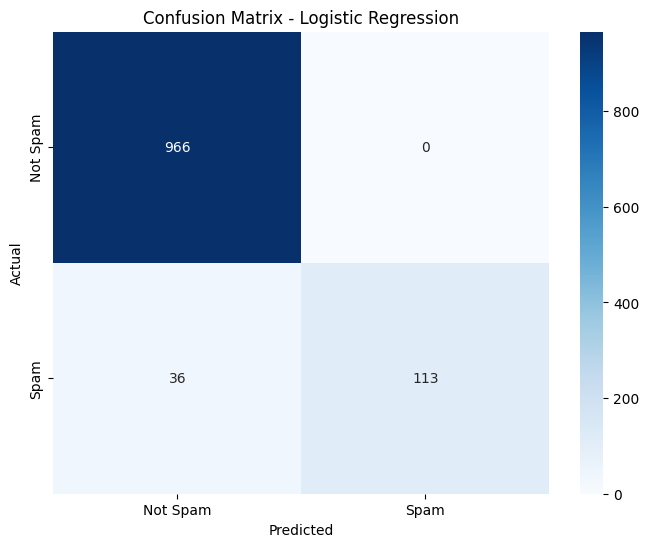

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()






ACCURACY,CLASSIFICATION REPORT AND CONFUSION MATRIX FROM NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(X_train_tfidf,y_train)

y_pred=model.predict(X_test_tfidf)

Accuracy_of_model=accuracy_score(y_test,y_pred)
print("Accuracy:",Accuracy_of_model)

classification_report2=classification_report(y_test,y_pred)
print("Classification Report:\n",classification_report2)





Accuracy: 0.9766816143497757
Classification Report:
               precision    recall  f1-score   support

    Not spam       0.97      1.00      0.99       966
        spam       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



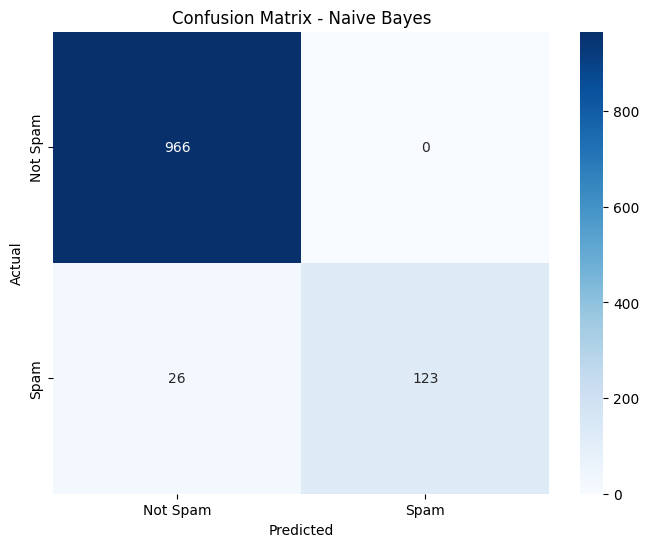

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


ACCURACY,CLASSIFICATION REPORT AND CONFUSION MATRIX FROM SUPPORT VECTOR MACHINE(SVM) CLASSIFIER

In [ ]:
from sklearn.svm import SVC

model=SVC()
model.fit(X_train_tfidf,y_train)

y_pred=model.predict(X_test_tfidf)

Accuracy_of_model=accuracy_score(y_test,y_pred)
print("Accuracy:",Accuracy_of_model)

classification_report3=classification_report(y_test,y_pred)
print("Classification Report:\n",classification_report3)

Accuracy: 0.9847533632286996
Classification Report:
               precision    recall  f1-score   support

    Not spam       0.98      1.00      0.99       966
        spam       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115



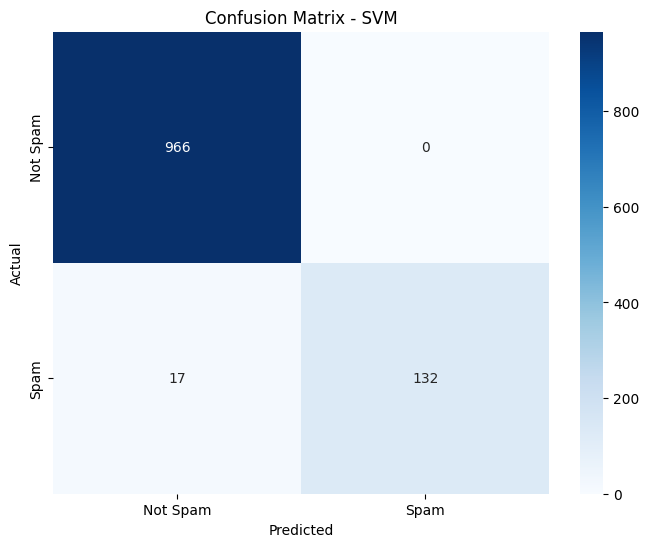

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()



ACCURACY,CLASSIFICATION REPORT AND CONFUSION MATRIX FROM RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train_tfidf,y_train)

y_pred=model.predict(X_test_tfidf)

Accuracy_of_model=accuracy_score(y_test,y_pred)
print("Accuracy:",Accuracy_of_model)

classification_report4=classification_report(y_test,y_pred)
print("Classification Report:\n",classification_report4)



Accuracy: 0.9802690582959641
Classification Report:
               precision    recall  f1-score   support

    Not spam       0.98      1.00      0.99       966
        spam       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



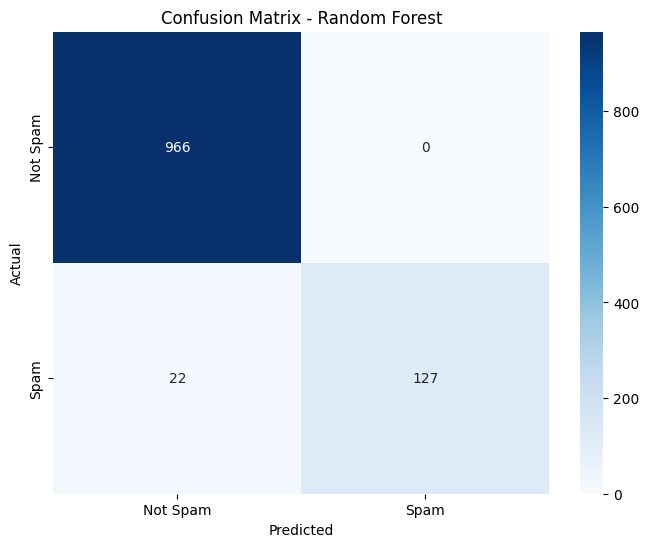

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


ACCURACY,CLASSIFICATION REPORT AND CONFUSION MATRIX FROM K NEAREST NEIGHBORS CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier()
model.fit(X_train_tfidf,y_train)

y_pred=model.predict(X_test_tfidf)

Accuracy_of_model=accuracy_score(y_test,y_pred)
print("Accuracy:",Accuracy_of_model)

classification_report5=classification_report(y_test,y_pred)
print("Classification Report:\n",classification_report5)



Accuracy: 0.9130044843049328
Classification Report:
               precision    recall  f1-score   support

    Not spam       0.91      1.00      0.95       966
        spam       1.00      0.35      0.52       149

    accuracy                           0.91      1115
   macro avg       0.95      0.67      0.73      1115
weighted avg       0.92      0.91      0.89      1115



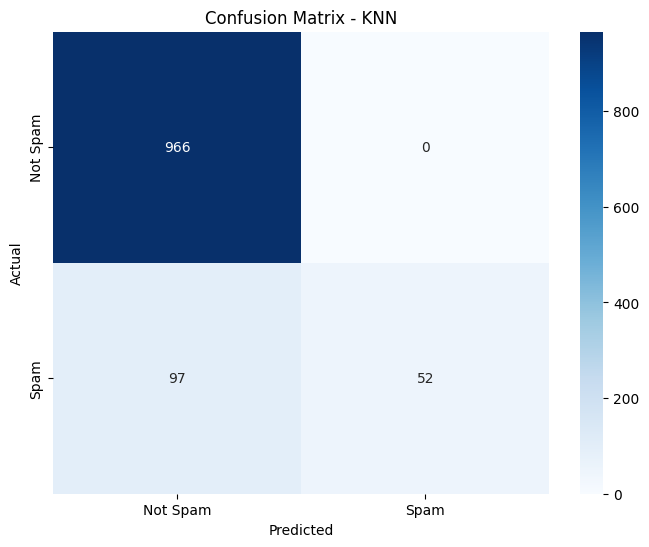

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()
